In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
#magic function -- Using inline backend the plots gets stored in the notebook

In [4]:
#reads a csv file
ds = pd.read_csv('movie_metadata.csv')
print(type(ds)) #ds is basically a dataframe which has many utility funcs. to work on the data.

ds.head(n=5) #shows 5 rows from the top
ds.tail(n=5) # shows 5 rows from the bottom

<class 'pandas.core.frame.DataFrame'>


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [6]:
data = ds.values #gives the data in a numpy array form
print(type(data))
print(data.shape)

print(data[:,1].shape) #all rows and column 1


<class 'numpy.ndarray'>
(5043, 28)
(5043,)


In [7]:
ds.columns #shows the names of all columns available in the data structure

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [8]:
s = ds.get('imdb_score') #Gives the specific column with the given column name
print(type(s)) # s is an object of series class
l = list(s) # We can convert an object of series into python list
print(type(l))
n = np.array(s) # Also to numpy array
print(n.shape)

<class 'pandas.core.series.Series'>
<class 'list'>
(5043,)


In [9]:
# calculate movie name length vs freq

titles = ds.get('movie_title')
print(titles.shape)
print(type(titles))

(5043,)
<class 'pandas.core.series.Series'>


In [10]:
#Iterate over titles 
freq_title = {} # Key(title len) Value(freq)

for title in titles:
    leng = len(title)
    try:
        freq_title[leng] += 1
    except:
        freq_title[leng] = 1
        
print(freq_title)

{7: 138, 41: 17, 8: 226, 22: 138, 55: 3, 12: 330, 13: 306, 24: 85, 39: 13, 35: 30, 17: 239, 18: 219, 43: 8, 16: 264, 44: 9, 15: 284, 42: 14, 23: 109, 11: 328, 36: 21, 19: 213, 10: 294, 27: 69, 20: 176, 32: 43, 26: 74, 25: 82, 14: 274, 21: 138, 31: 47, 51: 5, 6: 139, 5: 91, 63: 1, 3: 8, 9: 267, 38: 24, 28: 51, 29: 65, 34: 31, 57: 1, 47: 4, 4: 35, 37: 18, 48: 4, 46: 7, 40: 14, 45: 4, 49: 4, 50: 3, 30: 36, 33: 21, 2: 5, 59: 2, 60: 1, 56: 1, 84: 1, 54: 2, 87: 1, 53: 2, 72: 1, 69: 1, 80: 1, 67: 1}


In [11]:
l = list(freq_title.keys()) # make a list of movie title lengths 
a = np.array(l) # convert the list into a np array
print(a.min()) # min length of a movie title
print(a.max()) # max length of a movie title

2
87


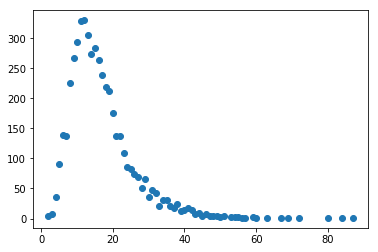

In [12]:
plt.scatter(freq_title.keys(), freq_title.values()) # On X-axis we got movie len and on Y-axis we got their freq.
plt.show()